<a href="https://colab.research.google.com/github/danaadcock/707-lecture-master/blob/main/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
import pandas as pd

# Read the file with specified encoding
x_resampled = pd.read_csv('data/x_resampled.csv', encoding='utf-8')


In [3]:
# Provide the full path to the file
file_path = "data/y_resampled.csv"

# Read the file with specified encoding
y_resampled = pd.read_csv(file_path, encoding='utf-8')

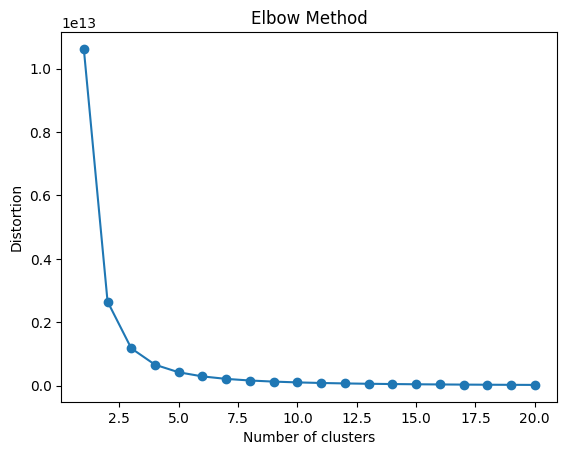

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to calculate the distortion for a range of cluster counts
def calculate_distortion(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Function to plot the elbow curve
def plot_elbow_curve(distortions):
    plt.plot(range(1, len(distortions) + 1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Calculate distortion for a range of cluster counts
max_clusters = 20  # You can adjust this based on your dataset and requirements
distortions = calculate_distortion(x_resampled, max_clusters)

# Plot the elbow curve
plot_elbow_curve(distortions)

In [9]:
from sklearn.decomposition import PCA
from umap import UMAP

# Initialize dimensionality reduction techniques
pca = PCA(n_components=50, random_state=42)  # Adjust the number of components as needed
umap = UMAP(n_components=2, random_state=42)

# Apply dimensionality reduction
x_pca = pca.fit_transform(x_resampled)
x_umap = umap.fit_transform(x_resampled)


/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/codespace/.python/current/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [13]:
x_pca = np.array(x_pca)
x_umap = np.array(x_umap)

In [17]:
# Fit and predict clusters for each algorithm on PCA-reduced data
kmeans_labels_pca = kmeans.fit_predict(x_pca)

In [19]:
hdbscan_labels_pca = hdbscan_clusterer.fit_predict(x_pca)

In [21]:
# Fit and predict clusters for each algorithm on UMAP-reduced data
kmeans_labels_umap = kmeans.fit_predict(x_umap)

In [22]:
hdbscan_labels_umap = hdbscan_clusterer.fit_predict(x_umap)

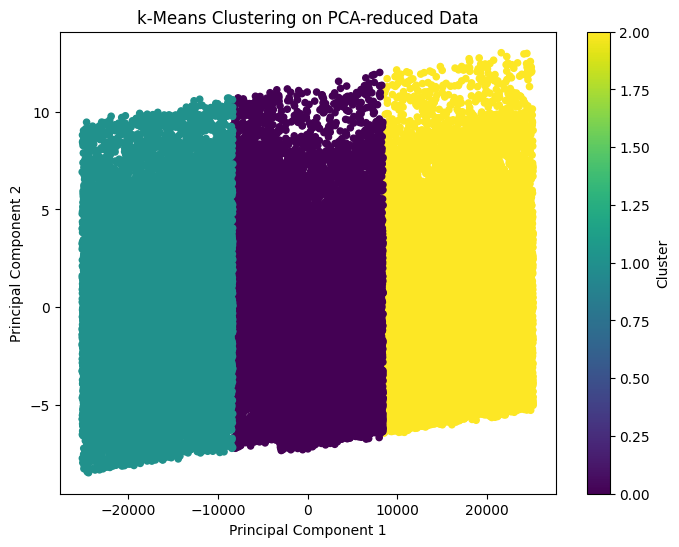

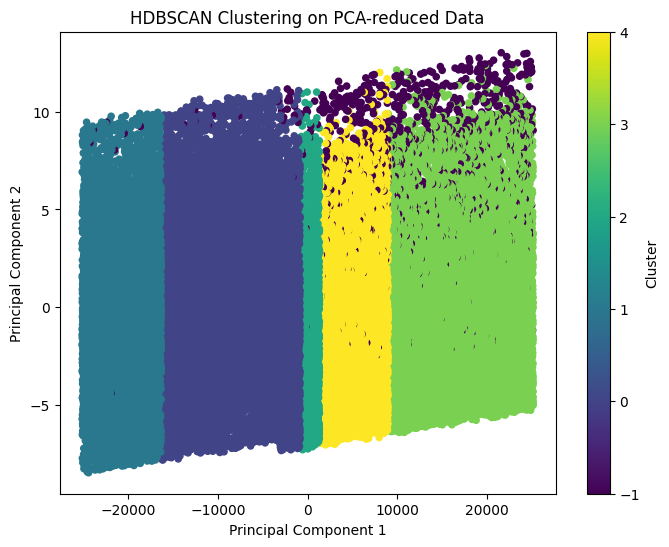

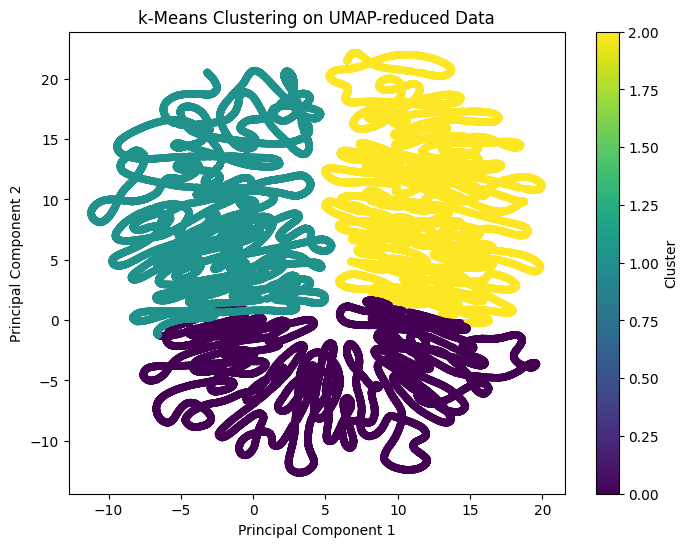

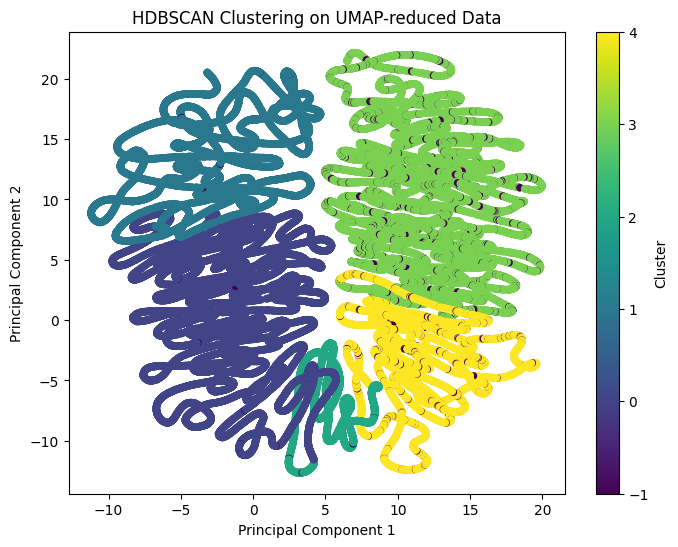

In [32]:
import matplotlib.pyplot as plt

# Plot clusters for k-Means on PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', s=20)
plt.title('k-Means Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for HDBSCAN on PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=hdbscan_labels_pca, cmap='viridis', s=20)
plt.title('HDBSCAN Clustering on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

import matplotlib.pyplot as plt

# Plot clusters for k-Means on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=kmeans_labels_pca, cmap='viridis', s=20)
plt.title('k-Means Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Plot clusters for HDBSCAN on UMAP-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=hdbscan_labels_pca, cmap='viridis', s=20)
plt.title('HDBSCAN Clustering on UMAP-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
